In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 사용을 위한 설정(Window)
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font', family=font_name)

1. 데이터 수집 및 로드

In [16]:
df = pd.read_csv('data/incomeDrug.csv')
df.head()

,Year,1인당실질소득,물가,마약류,향정류,대마,총마약사건수,마약규제지수,마약관련행정시스템변화,마약관련법개정,실업률
0,2010,3144,86.4,1124,6771,1837,9732,1,0,0,3.7
1,2011,3173,89.9,759,7226,1189,9174,1,0,0,3.4
2,2012,3252,91.8,582,7631,1042,9255,2,1,1,3.2
3,2013,3364,93.0,685,7902,1177,9764,1,0,0,3.1
4,2014,3459,94.2,676,8121,1187,9984,2,1,1,3.5


2. 데이터구조 및 변수 이해

In [17]:
print(df.info())
print(df.shape)
# 마약규제지수
# 0~2: 규제 완화 또는 규제 거의 없음
# 3~5: 중간 수준 규제 (단속 강화, 처벌 기준 강화 등)
# 6~8: 강도 높은 규제 (수사 권한 확대, 처벌 대폭 강화 등)
# 9~10: 최강 규제 수준 (범정부 종합대책, 특별법, 전면 단속 등)


# 마약관련행정시스템변화 
# 마약류 관리 시스템, 등록 시스템, 수출입 관리 체계 같은 행정적/기술적 시스템 개편이 있었는지 표시하는 지표
# 0: 시스템 변화 없음
# 1: Minor 업데이트 (신고 절차 변경, 내부 운영규정 개정 등)
# 2: Major 업데이트 (마약류통합관리시스템(NIMS) 대대적 개편 등)

# 마약관련법개정      
# 해당 연도에 마약류 관련 법이 개정됐는지, 그 강도를 표시하는 값.
# 0: 법 개정 없음
# 1: 경미한 개정
# 2: 중요한 개정
# 3: 전면 개정 또는 강력한 처벌 강화

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         15 non-null     int64  
 1   1인당실질소득      15 non-null     int64  
 2   물가           15 non-null     float64
 3   마약류          15 non-null     int64  
 4   향정류          15 non-null     int64  
 5   대마           15 non-null     int64  
 6   총마약사건수       15 non-null     int64  
 7   마약규제지수       15 non-null     int64  
 8   마약관련행정시스템변화  15 non-null     int64  
 9   마약관련법개정      15 non-null     int64  
 10  실업률          15 non-null     float64
dtypes: float64(2), int64(9)
memory usage: 1.4 KB
None
(15, 11)


3. 데이터요약 및 기술통계

In [18]:
display(df.describe())

,Year,1인당실질소득,물가,마약류,향정류,대마,총마약사건수,마약규제지수,마약관련행정시스템변화,마약관련법개정,실업률
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2017.000000,3782.400000,98.546667,1568.400000,10895.266667,2206.333333,14670.000000,2.000000,0.200000,0.200000,3.440000
std,4.472136,410.936526,7.825678,886.134366,3666.752484,1134.882729,5404.198117,0.845154,0.414039,0.414039,0.404969
min,2010.000000,3144.000000,86.400000,582.000000,6771.000000,1042.000000,9174.000000,1.000000,0.000000,0.000000,2.700000
25%,2013.500000,3411.500000,93.600000,941.500000,8011.500000,1188.000000,9874.000000,1.000000,0.000000,0.000000,3.150000
50%,2017.000000,3932.000000,97.600000,1467.000000,10631.000000,1727.000000,14123.000000,2.000000,0.000000,0.000000,3.600000
75%,2020.500000,4075.500000,101.250000,1879.000000,11823.000000,3264.500000,17101.500000,3.000000,0.000000,0.000000,3.700000
max,2024.000000,4391.000000,114.200000,3970.000000,19556.000000,4085.000000,27611.000000,3.000000,1.000000,1.000000,4.000000


4. 중복값, 결측치, 이상치 탐지 및 전처리

In [19]:
# 중복값 : 연도별로 나오는 개별 데이터로 겹치는 값 존재하지 않음
# 결측치 없음
df.isna().sum() 

Year           0
1인당실질소득        0
물가             0
마약류            0
향정류            0
대마             0
총마약사건수         0
마약규제지수         0
마약관련행정시스템변화    0
마약관련법개정        0
실업률            0
dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

# 네가 준 데이터 기준 숫자형 컬럼
num_cols = [
    '1인당실질소득','물가','마약류','향정류','대마','총마약사건수',
    '실업률'
]

# 스케일링
scaler = StandardScaler()
scaled = scaler.fit_transform(df[num_cols])

df_scaled = pd.DataFrame(scaled, columns=num_cols)


df_scaled.head()


,1인당실질소득,물가,마약류,향정류,대마,총마약사건수,실업률
0,-1.608051,-1.606633,-0.519106,-1.164251,-0.336860,-0.945805,0.664558
1,-1.535003,-1.143690,-0.945465,-1.035808,-0.927884,-1.052682,-0.102240
2,-1.336012,-0.892378,-1.152219,-0.921479,-1.061960,-1.037167,-0.613438
3,-1.053898,-0.733655,-1.031904,-0.844978,-0.938829,-0.939675,-0.869038
4,-0.814605,-0.574931,-1.042417,-0.783156,-0.929709,-0.897538,0.153360


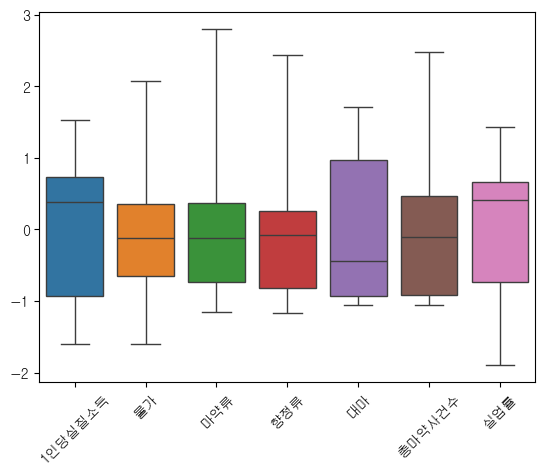

In [21]:
# 이상치탐지 : 특이값 x
# 연도별 마약류사건 증가에 따라 이상치 기준을 2.5로 완화함
sns.boxplot(
    data=df_scaled[['1인당실질소득','물가','마약류','향정류','대마',
             '총마약사건수','실업률']],
    whis=2.5
)

plt.xticks(rotation=45)
plt.show()



5. 변수 분포 시각화

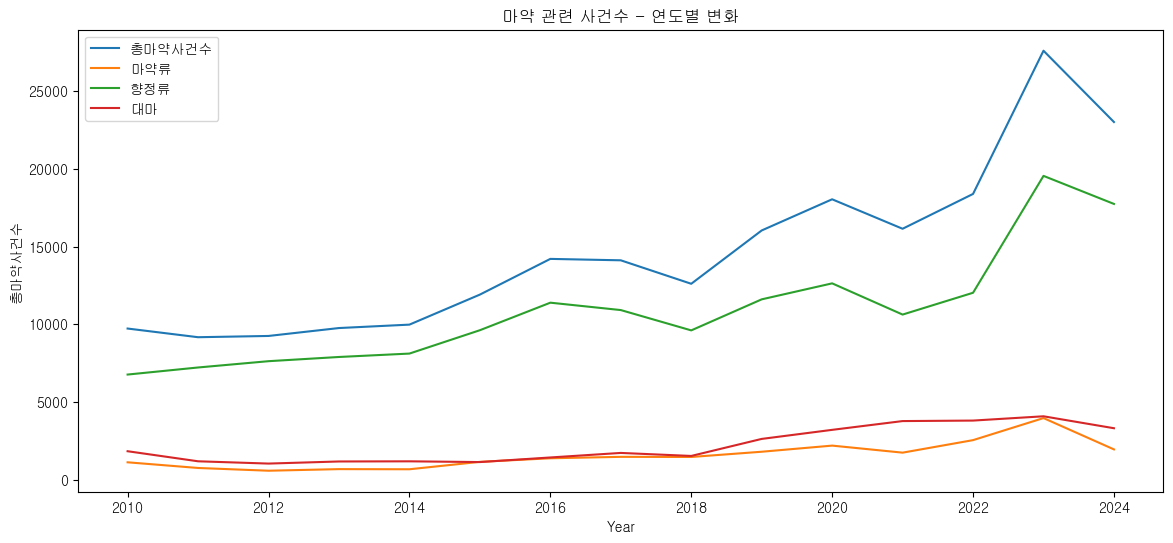

In [22]:
# 1) 전체 흐름
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Year', y='총마약사건수', label='총마약사건수')
sns.lineplot(data=df, x='Year', y='마약류', label='마약류')
sns.lineplot(data=df, x='Year', y='향정류', label='향정류')
sns.lineplot(data=df, x='Year', y='대마', label='대마')
plt.legend()
plt.title("마약 관련 사건수 - 연도별 변화")
plt.show()

# 2015년 이후 본격적인 상승국면에 들어갔음을 알 수 있다. 
# 마약 폭증의 1차 원인은 향정류로 보임. -> 의약품 오남용과 불법유통이 큰 문제.

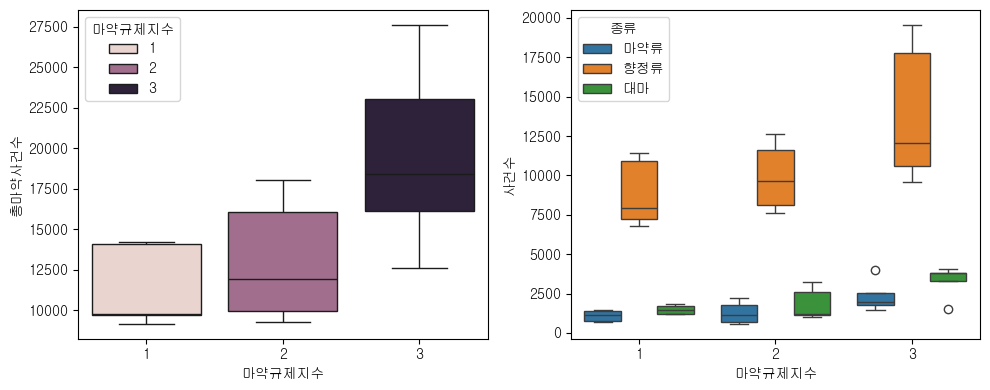

In [23]:
# 2) 정책과 사건의 관계 시각화
# (1) 규제 수준별 사건 분포 / (2) 규제 수준별 마약 종류 차이
_, axes  = plt.subplots(1,2,figsize=(10,4))

sns.boxplot(data=df, x='마약규제지수', y='총마약사건수', ax=axes[0], hue='마약규제지수')
# (1)
df_long = df.melt(id_vars='마약규제지수',
                  value_vars=['마약류','향정류','대마'],
                  var_name='종류',
                  value_name='사건수')

# (2)
sns.boxplot(data=df_long, x='마약규제지수', y='사건수', hue='종류', ax=axes[1])
plt.tight_layout()
plt.show()

# 첫번째 그래프 설명
# - 규제지수 3일때 오히려 사건수가 가장 높게 나타난것을 볼 수 있다. 
# - 규제가 강해진다고해서 사건이 줄지 않음을 알 수 있음.
# - 사건분포의 폭이 넓어지는것을 보면 사분위 범위가 증가하여 시장변동성이 커지고, 규제 강화에 따른 시장적 저항/ 
# 분화가 커졌음을 알 수 있다.

# 두번째 그래프 설명
# - 규제지수에 관계 없이 향정류가 가장 압도적인 사건수를 보인다. 
# - 대마도 증가하고 있지만 향정류처럼 폭발적이지 않음, 2018년 이후 우리나라를 비롯한 글로벌 대마 합법화 움직임으로 
# 대마 상승이 있으나 향정류처럼 폭발적이진 않다.
# - 전통 마약류(코카인, 헤로인)는 완만한 증가세를 보이고 사건수도 크지는 않다.

# 두 그래프의 시사점
# - 규제가 강할수록 사건수가 더 많이보이는데 이는 사건이 많아졌을때 사후적으로 규제가 적용되었음을 알 수 있다. 


<Axes: >

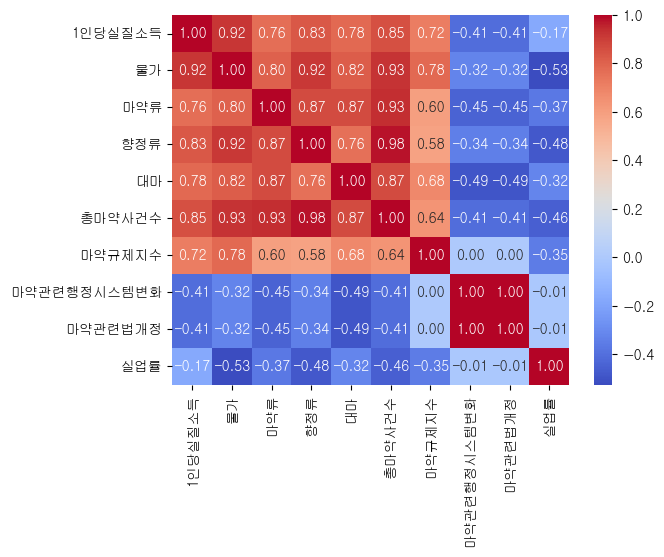

In [24]:
# 3) 경제 변수와 사건의 관계
sns.heatmap(df.iloc[:,1:].corr(), annot=True, cmap='coolwarm', fmt=".2f")

# 실질소득·물가와 마약 사건수는 강한 양의 상관관계 → 경제성장과 함께 마약도 증가
# 실업률은 마약 사건수와 음의 상관관계 → 실업률이 떨어질수록 마약사건이 증가
# 정책(행정·법개정)은 사건 억제효과가 거의 없음 → 오히려 사건 증가와 함께 등장하는 사후적 반응
# 마약류·향정류·대마 모두 경제 변수와 밀접한 동반 상승 구조

# “취업 > 여유자금 > 여가소비” 구조가 약물 소비 증가에 영향을 줌
# 제도 도입 후 단기적으로 보고서상 사건이 감소하는 것처럼 보일 수 있지만
# 장기적 억제 효과는 없음

# 경제 변수인 실질소득과 물가 상승은 마약 사건 증가와 강한 양의 상관관계를 보이며, 
# 실업률은 오히려 사건수와 음의 상관을 보인다. 이는 한국의 마약 확산이 빈곤형 범죄가 아니라 온라인 기반의 
# 소비형·여가형 약물 시장 구조로 이동하고 있음을 시사한다. 향정류는 경제 조건에 가장 민감하며, 
# 규제 강화는 사건 억제보다는 사후 대응 성격이 강하다.


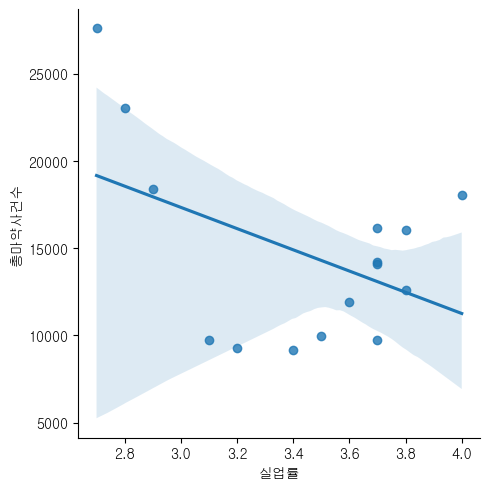

In [25]:
# 4) 산점도 + 회귀선
sns.lmplot(data=df, x='실업률', y='총마약사건수')
plt.show()


# 회귀선의 기울기가 음의 기울기 : 즉, 실업률과 마약사건은 반비례관계
# 차트 초반 실업률이 2.7~3.0이던 시기 마약사건수가 가장 높은데 경제 호황기, 취업률이 높은 시기에 마약사건이
# 폭증했음을 알 수 있음.

# 실업률과 총마약사건수는 뚜렷한 음의 상관관계를 보이며, 
# 실업률이 낮을수록 마약 사건수는 증가한다. 
# 이는 한국의 마약 확산이 실업·빈곤 기반이 아니라, 
# 경제활동이 활발한 계층의 소비형·여가형 약물 시장 구조에 의해 성장하고 있음을 시사한다.

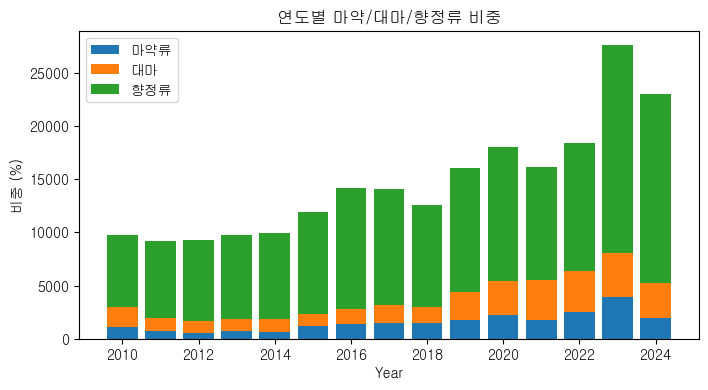

In [27]:
# 5) 마약 종류별 비중 변화

plt.figure(figsize=(8,4))

plt.bar(df['Year'], df['마약류'], label='마약류')
plt.bar(df['Year'], df['대마'], 
        bottom=df['마약류'], 
        label='대마')

plt.bar(df['Year'], df['향정류'], 
        bottom=df['마약류'] + df['대마'], 
        label='향정류')

plt.xlabel('Year')
plt.ylabel('비중 (%)')
plt.title('연도별 마약/대마/향정류 비중')
plt.legend()
plt.show()

# 한국의 마약 증가 문제는 “향정류 오남용”이 절대적
# 프로포폴·졸피뎀·메스암페타민 등 향정류 계열이 문제의 중심

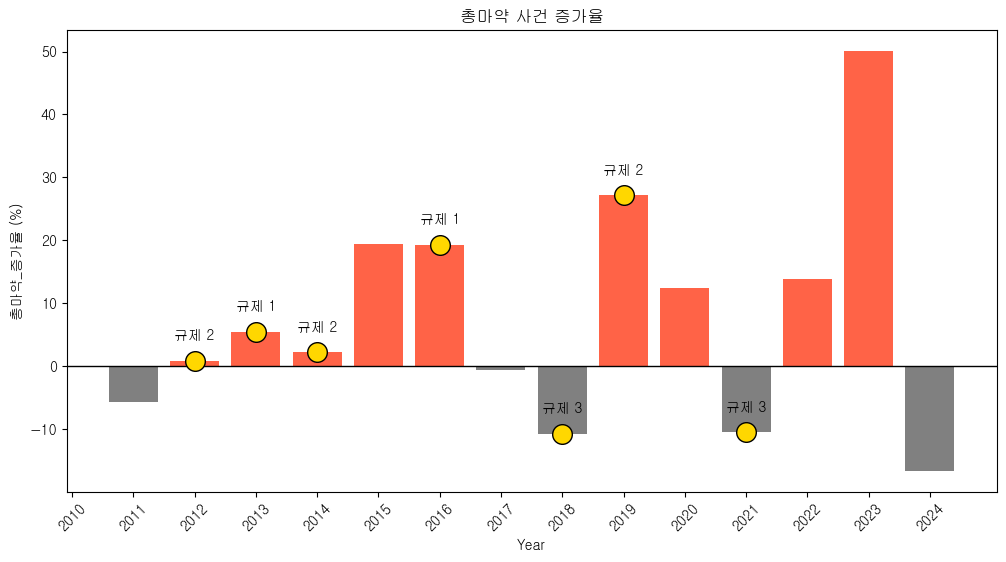

In [ ]:
# 6) 정책 변화(1,2,3)와 사건 증가율


# 1) 규제 변화가 발생한 연도 찾기
# 규제지수 변화가 있는 지점만 선택
reg_change_idx = df[df['마약규제지수'].diff() != 0].index

# 색상 지정 (증가율 양/음)
colors = df['총마약_증가율'].apply(lambda x: 'tomato' if x >= 0 else 'gray')

plt.figure(figsize=(12,6))

# 2) 기본 막대그래프
plt.bar(df['Year'], df['총마약_증가율'], color=colors)

# 3) 규제 변경 지점을 동그라미로 표시
for idx in reg_change_idx:
    year = df.loc[idx, 'Year']
    y_val = df.loc[idx, '총마약_증가율']
    reg = df.loc[idx, '마약규제지수']
    
    # 동그라미 표시
    plt.scatter(year, y_val, color='gold', edgecolors='black', s=200, zorder=5)
    
    # 규제강도 텍스트 표시
    plt.text(year, y_val + 3, f"규제 {reg}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.axhline(0, color='black', linewidth=1)

plt.title("총마약 사건 증가율")
plt.xlabel("Year")
plt.ylabel("총마약_증가율 (%)")
plt.xticks(df['Year'], rotation=45)

plt.show()

# 2015년, 2020년, 2023년은 규제와 무관하게 마약사건이 증가했음을 알 수 있다. -> 정책이 사후적임을 알 수있다.
# 규제이후 단기적 하락이 있으나 다시 폭증하는 모습을 보인다. 

# 총마약 사건 증가율과 규제 강화 시점을 비교하면, 규제는 항상 사건 증가 이후에 도입되는 
# 사후 대응적 정책임이 명확하다. 규제 강도가 높아질수록 사건 증가율은 오히려 더 크게 나타나며, 
# 2015·2020·2023의 주요 폭증 구간은 규제와 무관하게 시장 자체의 구조적 성장에 의해 발생했다. 
# 규제 강화는 단기적으로 증가율을 낮추지만, 이후 다시 큰 폭증이 발생하는 반복 패턴을 보이며 
# 장기적 억제 효과는 없다.

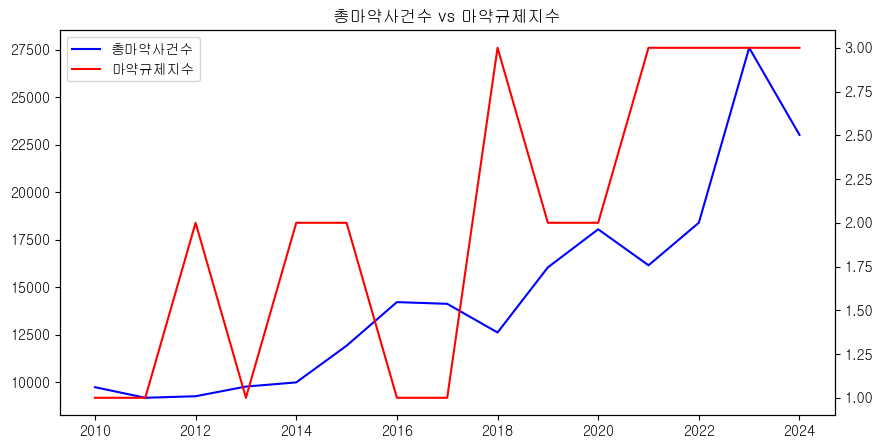

In [ ]:
# 7) 정책·경제·마약 사건 전체

fig, ax1 = plt.subplots(figsize=(10,5))

# 첫 축 (총마약사건수)
l1 = ax1.plot(df['Year'], df['총마약사건수'], label='총마약사건수', color='blue')

# 두 번째 축 (마약규제지수)
ax2 = ax1.twinx()
l2 = ax2.plot(df['Year'], df['마약규제지수'], label='마약규제지수', color='red')

# → seaborn lineplot을 쓰지 않고 matplotlib plot 사용 (겹침 0%)

# 수동으로 legend 하나만 만들기
lines = l1 + l2
labels = [line.get_label() for line in lines]

ax1.legend(lines, labels, loc='upper left')

plt.title("총마약사건수 vs 마약규제지수")
plt.show()

# 사건수가 오르고나서 규제 지수가 상승한다. 
# 마약사건이 발생한 후 규제가 이루어짐을 알 수 있다. 